In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ["OMP_NUM_THREADS"] = "9"


In [136]:
df = pd.read_csv("smartcart_customers.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [137]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

# Data preprocessing

### Handle missing values

In [138]:
df["Income"] = df["Income"].fillna(df["Income"].median())

In [139]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


### Feature engineering

In [140]:
#Age
df["Age"] = 2026 - df["Year_Birth"]

In [141]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst = True)
ref_date = df["Dt_Customer"].max()

df["Customer_Tenure_days"] = (ref_date - df["Dt_Customer"]).dt.days

In [142]:
#Spending
df["Total_Spending"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"] 

In [143]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_days,Total_Spending
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,8,10,4,7,0,1,69,663,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,1,1,2,5,0,0,72,113,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,1,8,2,10,4,0,0,61,312,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,2,0,4,6,0,0,42,139,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,5,3,6,5,0,0,45,161,422


In [144]:
#Children
df["Total_children"] = df["Kidhome"] + df["Teenhome"]

In [145]:
#Education
df["Education"].value_counts()

df["Education"] = df["Education"].replace({
    "Basic":"Unergraduate",
    "2n Cycle":"Undergraduate",
    "Graduation":"Graduate",
    "Master":"Postgraduate",
    "PhD":"Postgraduate"
})

In [146]:
#Marital status
df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [147]:
df["Living_With"] = df["Marital_Status"].replace({
    "Married":"Partner",
    "Together":"Partner",
    "Single":"Alone",
    "Divorced":"Alone",
    "Widow":"Alone",
    "Absurd":"Alone",
    "YOLO":"Alone"
})
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer_Tenure_days', 'Total_Spending',
       'Total_children', 'Living_With'],
      dtype='object')

### Drop Columns

In [150]:
cols = ["ID","Year_Birth","Marital_Status","Kidhome","Teenhome","Dt_Customer"]
spend = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]

cols_to_drop = cols + spend

cdf = df.drop(columns=cols_to_drop)

In [151]:
cdf.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_days,Total_Spending,Total_children,Living_With
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner


# Outliers

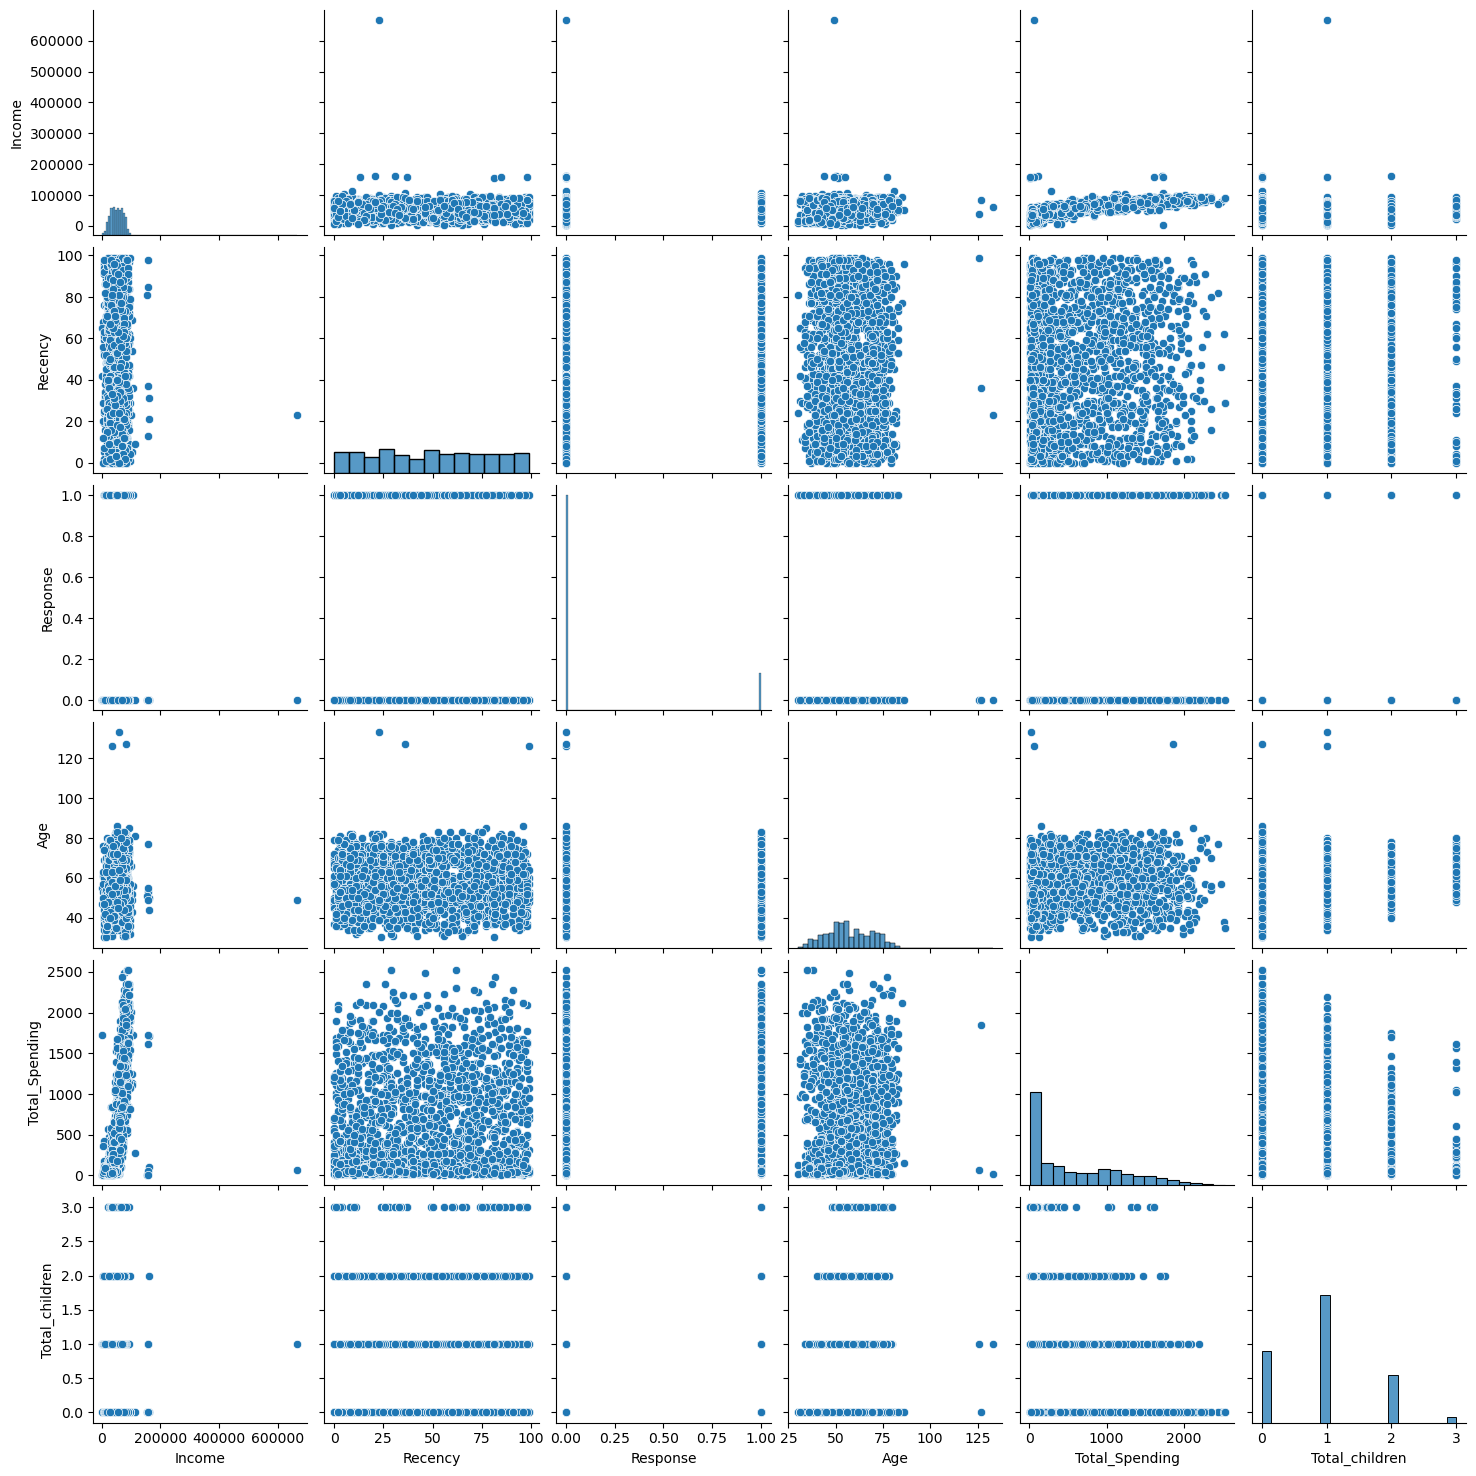

In [152]:
cols = ["Income", "Recency","Response","Age","Total_Spending","Total_children"]

sns.pairplot(cdf[cols])

In [153]:
# Remove the outliers
print(len(cdf))

cdf = cdf[(cdf["Age"] < 90)]
cdf = cdf[(cdf["Income"] < 600_000)]
print(len(cdf))

2240
2236


# Heatmap

In [154]:
corr = cdf.corr(numeric_only=True)

<Axes: >

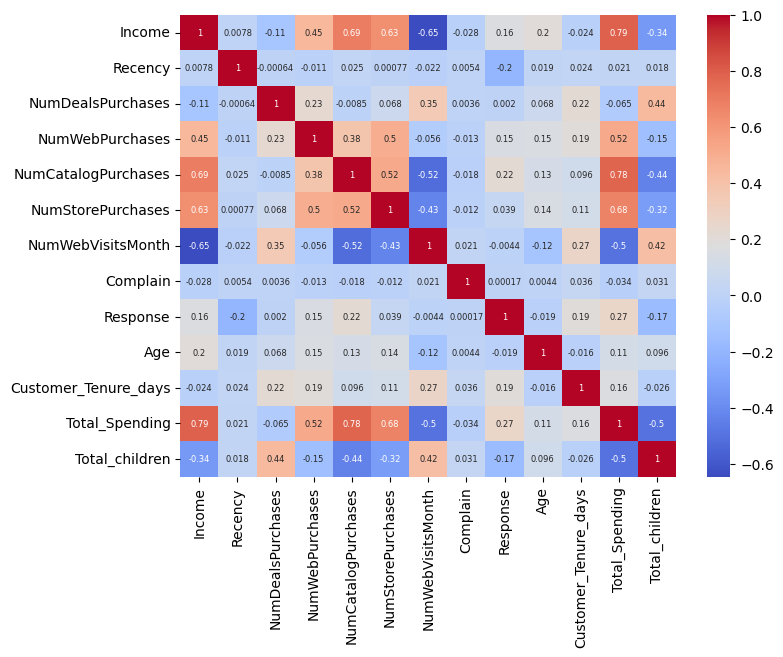

In [155]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True,annot_kws={"size":6}, cmap = "coolwarm")

In [156]:
cdf.columns

Index(['Education', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'Customer_Tenure_days', 'Total_Spending', 'Total_children',
       'Living_With'],
      dtype='object')

# Encoding

In [157]:
from sklearn.preprocessing import OneHotEncoder

In [158]:
ohe = OneHotEncoder()

cat_cols = ["Education","Living_With"]
enc_cols = ohe.fit_transform(cdf[cat_cols])

In [159]:
enc_df = pd.DataFrame(enc_cols.toarray(), columns=ohe.get_feature_names_out(cat_cols), index=cdf.index)

In [160]:
df_encod = pd.concat([cdf.drop(columns=cat_cols) , enc_df], axis=1)

In [161]:
df_encod.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_days,Total_Spending,Total_children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Education_Unergraduate,Living_With_Alone,Living_With_Partner
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,0.0,1.0


# Scaling

In [162]:
from sklearn.preprocessing import StandardScaler

In [163]:
scaler = StandardScaler()

x = df_encod
xs = scaler.fit_transform(x)

# Visualize

In [164]:
# 2D
from sklearn.decomposition import PCA

In [165]:
pca = PCA(n_components=3)

xpca = pca.fit_transform(xs)

In [166]:
pca.explained_variance_ratio_

array([0.22035061, 0.10797909, 0.0986477 ])

Text(0.5, 0.92, '3d projection')

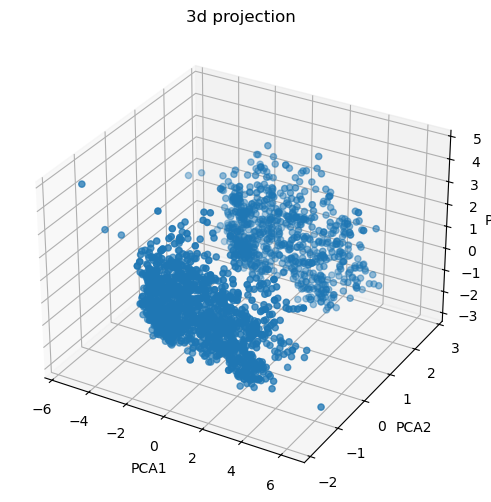

In [167]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xpca[:,0],xpca[:,1], xpca[:,2])

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3d projection")

# Analyse K value

In [168]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_predict(xpca)
    wcss.append(kmeans.inertia_)

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [169]:
knee = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")
optimal_k = knee.elbow

In [170]:
print("Best k = ",optimal_k)

Best k =  3


Text(0, 0.5, 'WCSS')

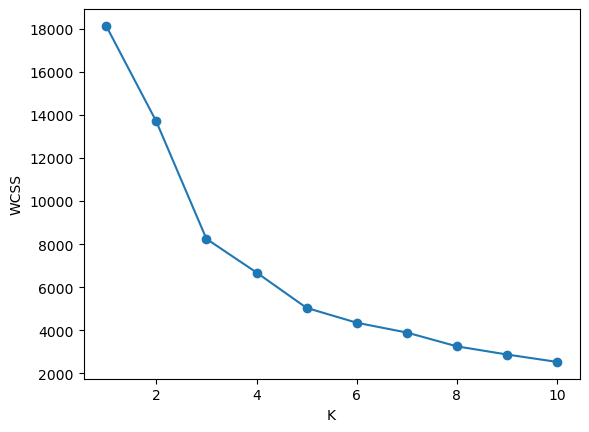

In [171]:
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("K")
plt.ylabel("WCSS")

## Silhoutte score

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

Text(0, 0.5, 'Silhouette score')

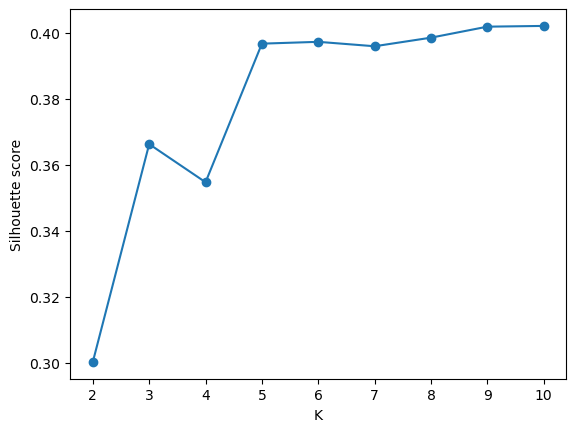

In [172]:
from sklearn.metrics import silhouette_score
scores = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(xpca)
    score = silhouette_score(xpca, labels)
    scores.append(score)

plt.plot(range(2,11), scores, marker='o')
plt.xlabel("K")
plt.ylabel("Silhouette score")

Text(0, 0.5, 'Silhouette score')

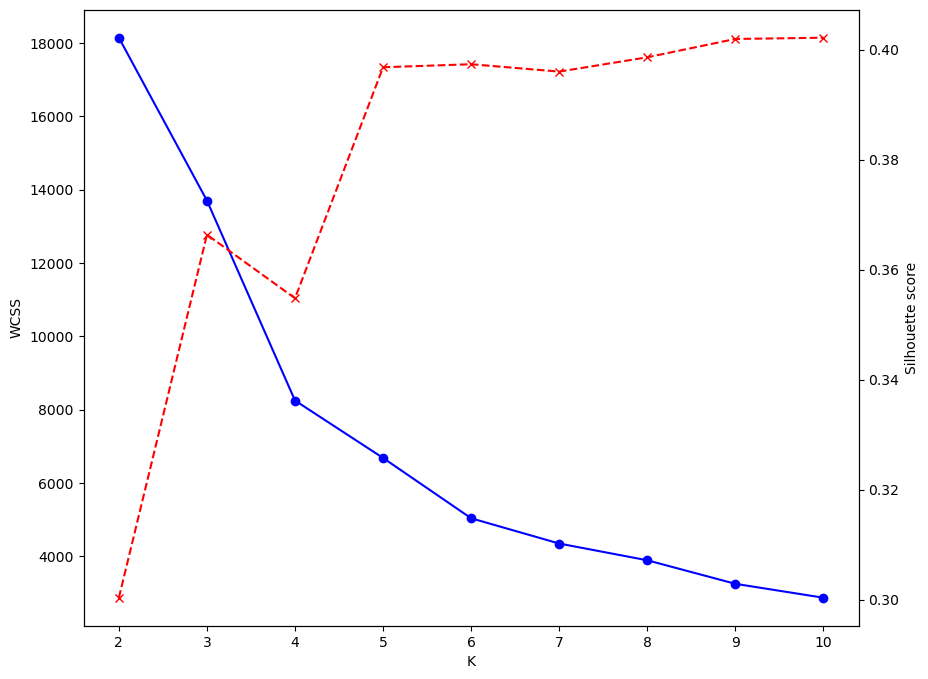

In [173]:
# combined plot

k_range = range(2,11)
fig, ax1 = plt.subplots(figsize=(10,8))
ax1.plot(k_range, wcss[:len(k_range)], marker='o', color="blue")
ax1.set_xlabel("K")
ax1.set_ylabel("WCSS")

ax2 = ax1.twinx()
ax2.plot(k_range, scores[:len(k_range)], marker='x', color="red", linestyle="--")
ax2.set_ylabel("Silhouette score")

#  Clustering

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


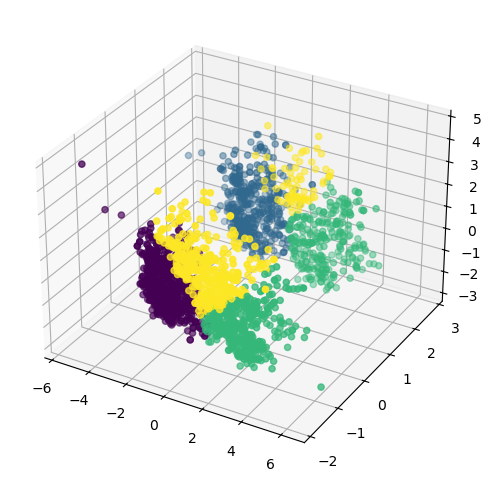

In [174]:
#Kmeans
kmeans = KMeans(n_clusters=4, random_state=42)
labelsk = kmeans.fit_predict(xpca)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xpca[:,0],xpca[:,1], xpca[:,2], c=labelsk)

In [175]:
#Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

In [176]:
agg_clf = AgglomerativeClustering(n_clusters=4, linkage="ward")
labelsagg = agg_clf.fit_predict(xpca)

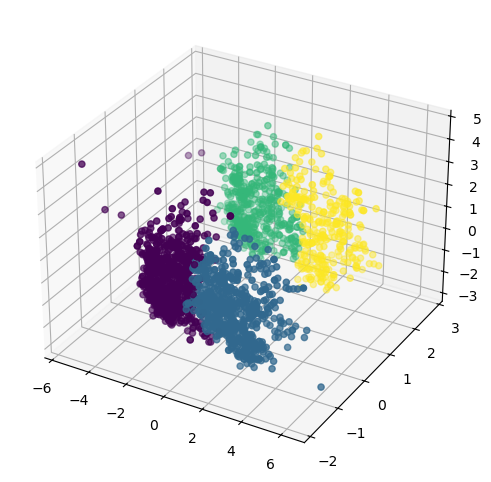

In [177]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xpca[:,0],xpca[:,1], xpca[:,2], c=labelsagg)

# Characterization of clusters

In [178]:
x["cluster"] = labelsagg


<Axes: xlabel='cluster', ylabel='count'>

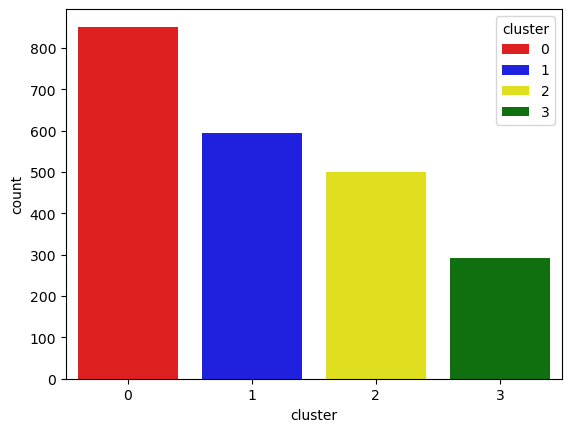

In [179]:
pal = ["red","blue","yellow","green"]
sns.countplot(x=x["cluster"], palette=pal, hue=x["cluster"])

<Axes: xlabel='Total_Spending', ylabel='Income'>

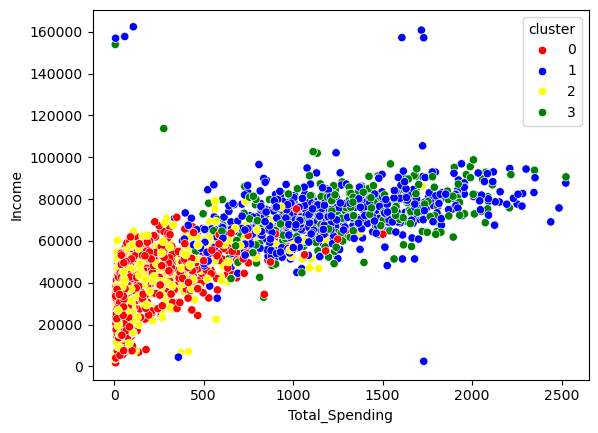

In [180]:
# Income and spending patterns

sns.scatterplot(x=x["Total_Spending"], y=x["Income"], hue=x["cluster"], palette=pal)

In [181]:
# Cluster summary

clustersum = x.groupby("cluster").mean()
print(clustersum)

               Income    Recency  NumDealsPurchases  NumWebPurchases  \
cluster                                                                
0        38054.397180  49.136310           2.663925         2.941246   
1        71555.829680  48.949410           1.978078         5.715008   
2        40229.849699  48.220441           2.551102         3.144289   
3        72609.047782  50.921502           1.665529         5.730375   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
cluster                                                                        
0                   0.862515           3.875441           6.540541  0.008226   
1                   5.193929           8.561551           3.629005  0.010118   
2                   1.084168           4.166333           6.352705  0.010020   
3                   5.460751           8.549488           3.430034  0.006826   

         Response        Age  Customer_Tenure_days  Total_Spending  \
cluster         